# Regression Trees


Regression trees are a type of [decision tree](https://fedmug.github.io/kbtu-ml-book/decision_trees/decision_tree.html) used for predicting continuous numerical outcomes. They recursively split the dataset into subsets based on feature values, with each leaf node representing a predicted numeric value for the target variable.



## Why Regression Trees?

Decision trees and regression trees share a common structure as hierarchical tree models, but their primary difference lies in the nature of the target variable they predict. Decision trees are versatile and can handle both categorical and numerical targets using methods like [Classification](https://fedmug.github.io/kbtu-ml-book/decision_trees/classification.html#) and Regression Trees (**CART**). In contrast, regression trees specifically focus on predicting continuous numerical outcomes, making them suitable for scenarios where the response variable is quantitative.


As with the Decision trees to create a Regression trees we neeed to:
* Divide the predictor space into J distinct and non-overlapping regions
* For each observation within a region, predict the mean of the response value in that specific region.
* The division of each region is determined by minimizing the **Residual Sum of Squares** (**RSS**) through a top-down greedy approach known as **recursive binary splitting**.




<br><br>

**Recursive Binary Splitting:**

The process begins with the selection of a feature $X_j$ and a threshold value $t$ to partition the data into two subsets $R_1(j, t)$ and $R_2(j, t)$:

$$ R_1(j, t) = \{X | X_j \leq t\} $$

$$ R_2(j, t) = \{X | X_j > t\} $$

<br>

For splitting we also can use MSE:<br><br>

$$ {MSE} = \frac{1}{n_1} \sum_{i \in R_1} (y_i - \bar{y}_1)^2 + \frac{1}{n_2} \sum_{i \in R_2} (y_i - \bar{y}_2)^2 $$
<br>

where ${y}_1$ and ${y}_2$ are the means of the target variable in $R_1$ and $R_2$ respectively, and $n_1$ and $n_2$ are the respective sample sizes.


<br>
<br>

Let's test it on example:

Load the dataset:

In [ ]:
import numpy as np
import pandas as pd

boston = pd.read_csv("../ISLP_datasets/Boston.csv").drop("Unnamed: 0", axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Prepare the data:

In [ ]:
y = boston['MEDV']
X = boston.drop('MEDV', axis=1)


Split the data:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Train a regression decision tree:

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
print("Train R-score:", DT.score(X_train, y_train))
print("Test R-score:", DT.score(X_test, y_test))

Train R-score: 1.0
Test R-score: 0.8206653398733255


The tree is quite deep:

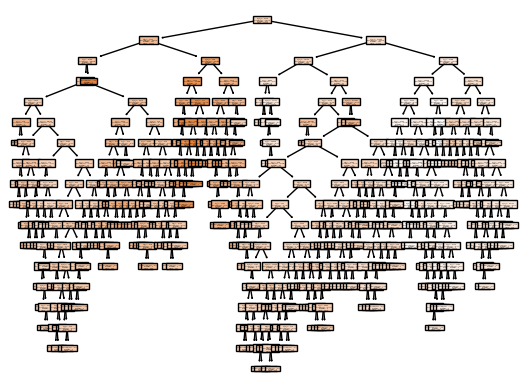

In [ ]:
plot_tree(DT, filled=True);

Let’s limit its depth:

In [ ]:
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(X_train, y_train)
print("Train R-score:", DT.score(X_train, y_train))
print("Test R-score:", DT.score(X_test, y_test))

Train R-score: 0.9283412334677333
Test R-score: 0.8591581580711656


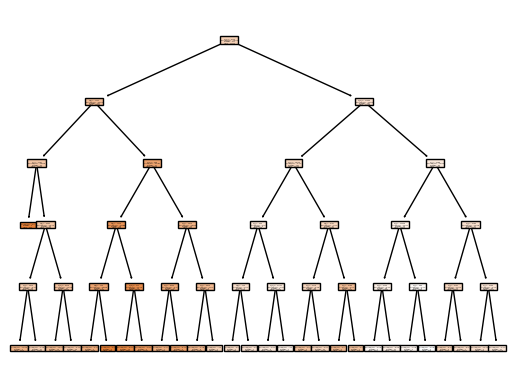

In [ ]:
plot_tree(DT, filled=True);

For a better tree visualisation, we use {bdg-danger-line}`graphviz`:

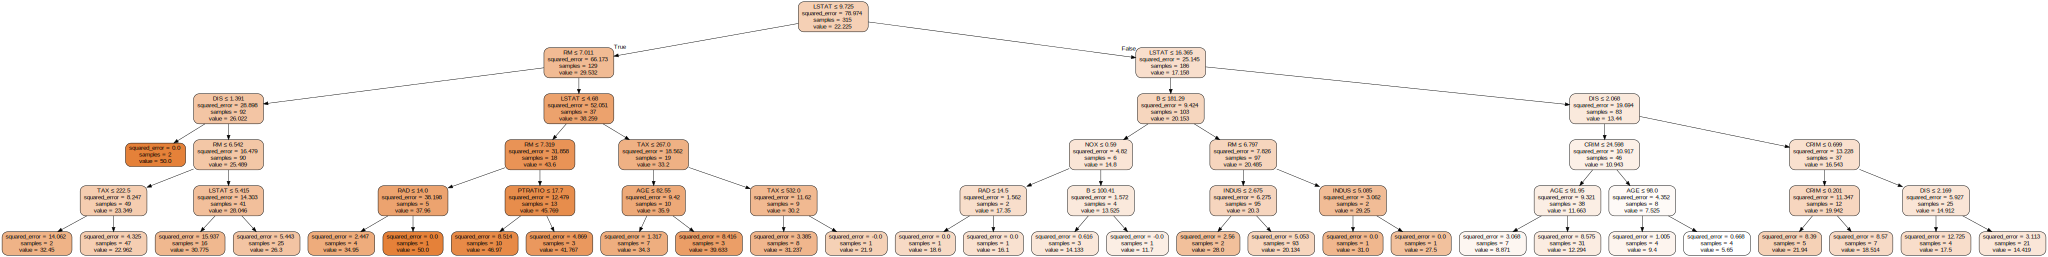

In [ ]:
import graphviz

dot_data = export_graphviz(DT, out_file=None,
                           feature_names=boston.columns[:-1],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

<br><br>

```{note}
Additionally, the impurity of a node is another concept used in decision trees. For regression trees, the Gini impurity is often employed, although it is technically a measure for classification trees. The Gini impurity for a node is given by:

$${Gini} = 1 - \sum_{i=1}^{k} p_i^2 $$

where:

- $k$ is the number of classes or values.
- $p_i$ is the proportion of samples in the node belonging to class or having value $i$.

In the context of regression trees, minimizing impurity effectively aligns with minimizing the **Mean Squared Error** (**MSE**).


```

<br>
<br>
<br>
<br>


## ChatGPT Suggestions

But we can use Regression trees in different cases too...

* Trees naturally extend to handle multi-class classification problems, where each leaf node predicts the most prevalent class, often referred to as the "majority class" or more technically, the "plurality class."
* Trees are versatile and applicable to regression tasks as well. Instead of predicting a class in the leaf nodes, the model forecasts a numeric value, such as the average or median label. While the model retains predictions in the form of axis-aligned rectangles, the shift to numeric values prompts a change in the quality metric for determining the best split, typically measured by mean squared error.

Here is the example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor

Generate some random data:

In [2]:
np.random.seed(42)
X = np.random.rand(100, 2) * 10
y = X[:, 0] + X[:, 1] + np.random.normal(scale=0.5, size=100)

Train a RD tree model:

In [3]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

Create a grid of points to visualize the predictions:

In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Plot the data and the predictions:

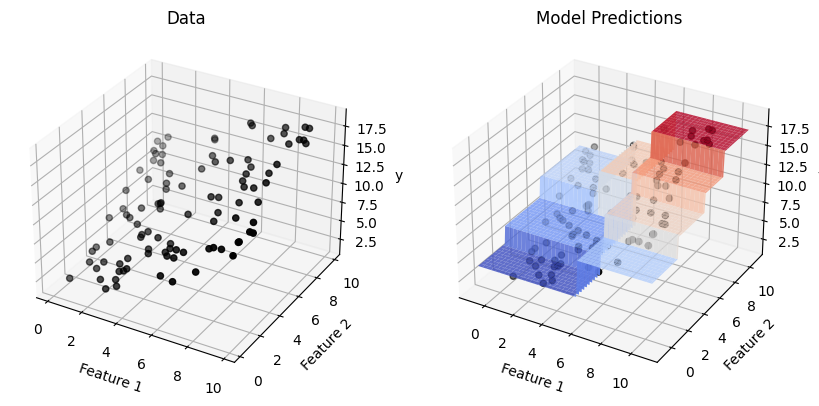

In [5]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c='black', marker='o')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('y')
ax1.set_title('Data')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X[:, 0], X[:, 1], y, c='black', marker='o')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('y')
_ = ax2.set_title('Model Predictions')

<br>
<br>
<br>
<br>

## Quiz

<span style="display:none" id="question1">W3sicXVlc3Rpb24iOiAiRm9yIGEgUmVncmVzc2lvbiBUcmVlIGJlaW5nIHRyYWluZWQgb24gYSBkYXRhc2V0IHdpdGggMjAwIHNhbXBsZXMsIGNhbGN1bGF0ZSB0aGUgR2luaSBpbXB1cml0eSBmb3IgYSBub2RlIHdpdGggdGhyZWUgY2xhc3Nlcywgd2hlcmUgdGhlIGNsYXNzIGRpc3RyaWJ1dGlvbiBpcyBhcyBmb2xsb3dzOiBDbGFzcyBBICg1MCBzYW1wbGVzKSwgQ2xhc3MgQiAoMTAwIHNhbXBsZXMpLCBDbGFzcyBDICg1MCBzYW1wbGVzKS4iLCAidHlwZSI6ICJudW1lcmljIiwgInByZWNpc2lvbiI6IDQsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDAuNjI1LCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0LiJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbMC42MiwgMC42M10sICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlJpZ2h0LiJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbLTEwMDAwMDAwMCwgMF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJUcnkgYWdhaW4uIn0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFsxLCAxMDAwMDAwMF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJUcnkgYWdhaW4uIn1dfV0=</span>

<span style="display:none" id="question2">W3sicXVlc3Rpb24iOiAiSW4gdGhlIGNvbnRleHQgb2YgdGhlIHByb3ZpZGVkIGV4YW1wbGUgY29kZSwgd2hhdCBpcyB0aGUgc2lnbmlmaWNhbmNlIG9mIHRoZSBNZWFuIFNxdWFyZWQgRXJyb3IgKE1TRSkgaW4gdGhlIGRlY2lzaW9uLW1ha2luZyBwcm9jZXNzIGR1cmluZyB0aGUgdHJlZS1idWlsZGluZyBwaGFzZT8iLCAidHlwZSI6ICJtdWx0aXBsZV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImNvZGUiOiAiSXQgbWVhc3VyZXMgdGhlIGFjY3VyYWN5IG9mIHRoZSBEZWNpc2lvbiBUcmVlIG1vZGVsIG9uIHRoZSB0ZXN0IHNldCIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiSXQgcXVhbnRpZmllcyB0aGUgaW1wdXJpdHkgb2YgYSBub2RlIGluIGEgY2xhc3NpZmljYXRpb24gdHJlZSIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiSXQgZXZhbHVhdGVzIHRoZSBxdWFsaXR5IG9mIHNwbGl0cyBieSBtaW5pbWl6aW5nIHRoZSB2YXJpYW5jZSBvZiBwcmVkaWN0ZWQgdmFsdWVzIHdpdGhpbiByZXN1bHRpbmcgc3Vic2V0cyIsICJjb3JyZWN0IjogdHJ1ZX0sIHsiY29kZSI6ICJJdCByZXByZXNlbnRzIHRoZSB0b3RhbCBlcnJvciBvZiB0aGUgbW9kZWwgYWNyb3NzIGFsbCBub2RlcyIsICJjb3JyZWN0IjogZmFsc2V9XX1d</span>

In [ ]:
from jupyterquiz import display_quiz
display_quiz("#question1")
display_quiz("#question2")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>